In [1]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('traindata.csv' , encoding ="ISO-8859-1", header=None, names=['ham/spam', 'message'])

In [22]:
df.sample(5)

,ham/spam,message
3497,spam,free nokia or motorola with upto 12mths 1/2pri...
237,spam,we know someone who you know that fancies you....
1196,ham,i meant middle left or right?
2244,ham,no drama pls.i have had enough from you and fa...
298,spam,want to funk up ur fone with a weekly new tone...


In [23]:
df.shape

(4179, 2)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ham/spam  4179 non-null   object
 1   message   4179 non-null   object
dtypes: object(2)
memory usage: 65.4+ KB


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
df['ham/spam'] = encoder.fit_transform(df['ham/spam'])

In [28]:
df.head()

,ham/spam,message
0,0,ahhhh...just woken up!had a bad dream about u ...
1,0,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ..."
3,0,mum say we wan to go then go... then she can s...
4,0,never y lei... i v lazy... got wat? dat day Ì?...


In [29]:
df.isnull().sum()

ham/spam    0
message     0
dtype: int64

In [30]:
# check for duplicate values
df.duplicated().sum()

244

In [31]:
df = df.drop_duplicates(keep='first')

In [32]:
df.duplicated().sum()

0

In [33]:
df.shape

(3935, 2)

In [34]:
df['ham/spam'].value_counts()

0    3430
1     505
Name: ham/spam, dtype: int64

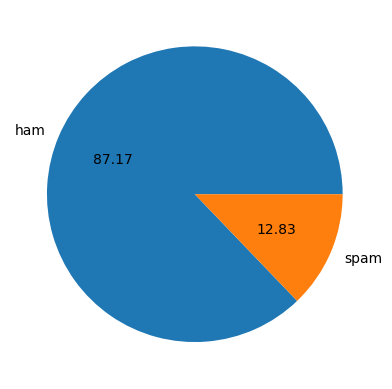

In [35]:
import matplotlib.pyplot as plt
plt.pie(df['ham/spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
df['num_characters'] = df['message'].apply(len)

In [38]:
df.head()

,ham/spam,message,num_characters
0,0,ahhhh...just woken up!had a bad dream about u ...,146
1,0,you can never do nothing,24
2,0,"now u sound like manky scouse boy steve,like! ...",115
3,0,mum say we wan to go then go... then she can s...,83
4,0,never y lei... i v lazy... got wat? dat day Ì?...,78


In [39]:
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
df.head()

,ham/spam,message,num_characters,num_words
0,0,ahhhh...just woken up!had a bad dream about u ...,146,38
1,0,you can never do nothing,24,5
2,0,"now u sound like manky scouse boy steve,like! ...",115,26
3,0,mum say we wan to go then go... then she can s...,83,19
4,0,never y lei... i v lazy... got wat? dat day Ì?...,78,23


In [41]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [42]:
df.head()

,ham/spam,message,num_characters,num_words,num_sentences
0,0,ahhhh...just woken up!had a bad dream about u ...,146,38,1
1,0,you can never do nothing,24,5,1
2,0,"now u sound like manky scouse boy steve,like! ...",115,26,2
3,0,mum say we wan to go then go... then she can s...,83,19,1
4,0,never y lei... i v lazy... got wat? dat day Ì?...,78,23,3


In [43]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3935.000000,3935.000000,3935.000000
mean,79.677001,18.616010,1.888437
std,59.075027,13.456295,1.279062
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,216.000000,24.000000


In [44]:
#ham message
df[df['ham/spam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3430.000000,3430.000000,3430.000000
mean,71.022449,17.280175,1.751020
std,57.457254,13.680687,1.196789
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,216.000000,24.000000


In [45]:
# spam message
df[df['ham/spam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,505.000000,505.000000,505.000000
mean,138.459406,27.689109,2.821782
std,28.415477,6.735978,1.422579
min,18.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,197.000000,46.000000,8.000000


In [46]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

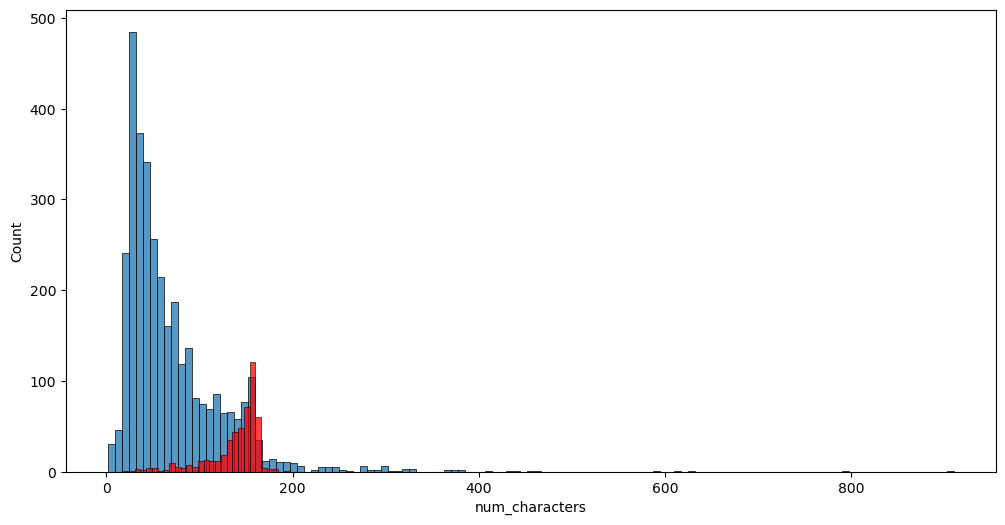

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['ham/spam'] == 0]['num_characters'])
sns.histplot(df[df['ham/spam'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

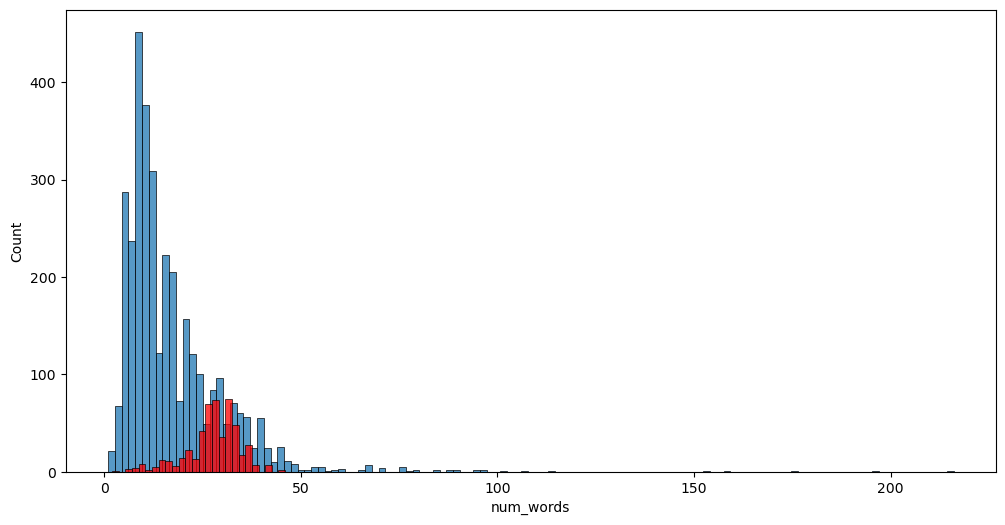

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['ham/spam'] == 0]['num_words'])
sns.histplot(df[df['ham/spam'] == 1]['num_words'],color='red')

<AxesSubplot:>

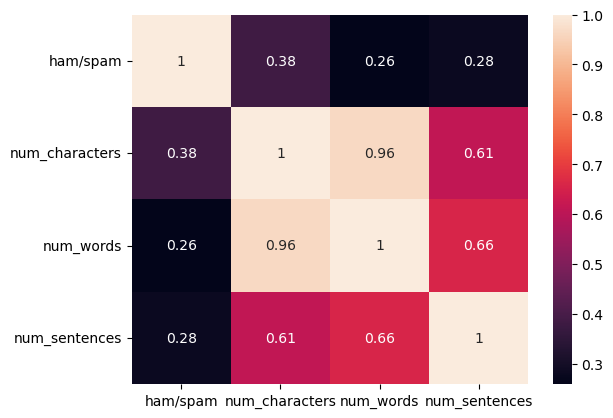

In [49]:
sns.heatmap(df.corr(),annot=True)

In [50]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [51]:
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [52]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('enjoying')

'enjoy'

In [53]:
transform_message("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [54]:
df['transformed_message'] = df['message'].apply(transform_message)

In [55]:
df.head()

,ham/spam,message,num_characters,num_words,num_sentences,transformed_message
0,0,ahhhh...just woken up!had a bad dream about u ...,146,38,1,ahhhh woken bad dream u tho dont like u right ...
1,0,you can never do nothing,24,5,1,never noth
2,0,"now u sound like manky scouse boy steve,like! ...",115,26,2,u sound like manki scous boy steve like travel...
3,0,mum say we wan to go then go... then she can s...,83,19,1,mum say wan go go shun bian watch da glass exh...
4,0,never y lei... i v lazy... got wat? dat day Ì?...,78,23,3,never lei v lazi got wat dat day ì send da url...


In [56]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [57]:
spam_wc = wc.generate(df[df['ham/spam'] == 1]['transformed_message'].str.cat(sep=" "))

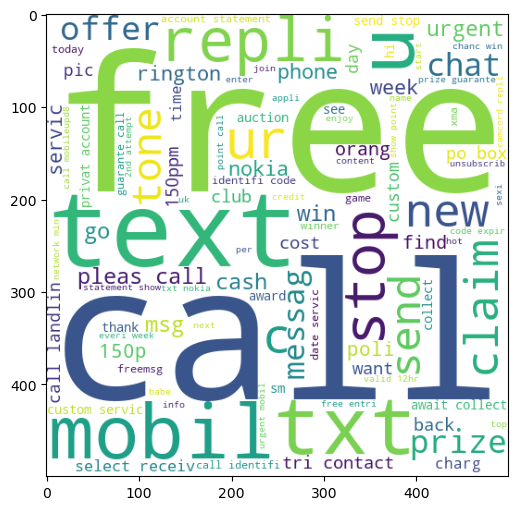

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [59]:
ham_wc = wc.generate(df[df['ham/spam'] == 0]['transformed_message'].str.cat(sep=" "))

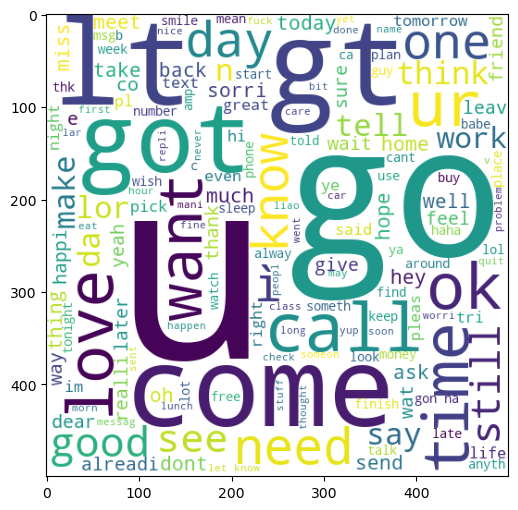

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [61]:
spam_corpus = []
for msg in df[df['ham/spam'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [62]:
len(spam_corpus)

7719

C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


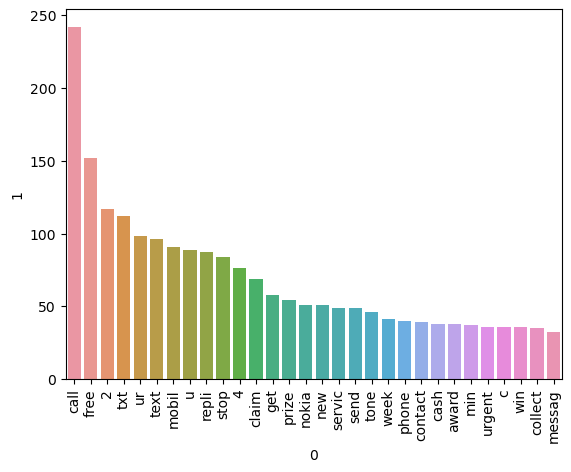

In [63]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
ham_corpus = []
for msg in df[df['ham/spam'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
len(ham_corpus)

27480

C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


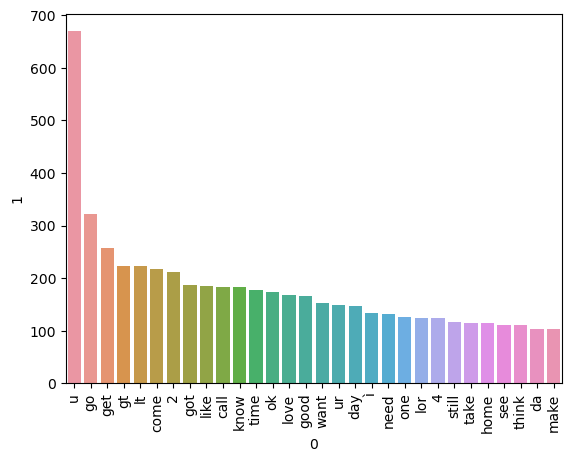

In [66]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [68]:
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [69]:
X.shape

(3935, 5842)

In [70]:
y = df['ham/spam'].values

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.841168996188056
[[567 107]
 [ 18  95]]
0.47029702970297027


In [77]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9529860228716646
[[674   0]
 [ 37  76]]
1.0


In [78]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9567979669631512
[[668   6]
 [ 28  85]]
0.9340659340659341


In [79]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [80]:
lrc.fit(X_train,y_train)
y_pred4 = lrc.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9453621346886912
[[668   6]
 [ 37  76]]
0.926829268292683


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [82]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [83]:
clfs = {
    'SVC' : svc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("Algorithm: ",name)
    print("Accuracy % : ",current_accuracy)
    print("Precision % : ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Algorithm:  SVC
Accuracy % :  0.974587039390089
Precision % :  0.9603960396039604
Algorithm:  NB
Accuracy % :  0.9529860228716646
Precision % :  1.0
Algorithm:  DT
Accuracy % :  0.9275730622617535
Precision % :  0.8043478260869565
Algorithm:  LR
Accuracy % :  0.9453621346886912
Precision % :  0.926829268292683
Algorithm:  RF
Accuracy % :  0.9682337992376112
Precision % :  0.9888888888888889
